In [56]:
import pandas as pd


Importar el Dataframe

In [57]:
df = pd.read_csv('/content/pinguinos_limpios_codificados_normalizados.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_id,species_id,island_id
0,0.254545,0.666667,0.152542,0.291667,1.0,0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0,1.0
4,0.261818,0.892857,0.305085,0.263889,1.0,0,1.0
...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,0.0,2,0.0
329,0.534545,0.142857,0.728814,0.597222,0.0,2,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,2,0.0
331,0.476364,0.202381,0.677966,0.694444,0.0,2,0.0


In [58]:
import tensorflow as tf
from tensorflow import keras
def crear_modelo():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for species
])

# Compile the model
#sparse_categorical_crossentropy si es es multiclase

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [59]:
df1 = df.copy()
df1 = df1.drop('species_id', axis=1)
df1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_id,island_id
0,0.254545,0.666667,0.152542,0.291667,1.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,1.0
4,0.261818,0.892857,0.305085,0.263889,1.0,1.0
...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,0.0,0.0
329,0.534545,0.142857,0.728814,0.597222,0.0,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,0.0
331,0.476364,0.202381,0.677966,0.694444,0.0,0.0


In [60]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
# Configurar la validación cruzada con K-Fold
X = df1.values
y = df['species_id'].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4, stratify=y)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = crear_modelo()

    # Entrenar el modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint])

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(accuracy)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}")
    fold_no += 1

# Evaluar el modelo en el conjunto de prueba
#test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"Mean Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Accuracy: 0.9815
Fold 2 - Accuracy: 1.0000
Fold 3 - Accuracy: 1.0000
Fold 4 - Accuracy: 1.0000
Fold 5 - Accuracy: 1.0000
Mean Cross-Validation Accuracy: 0.9963


In [70]:
model.load_weights('best_model.keras')
y_pred = model.predict(X_test)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[9.8030198e-01, 1.6935449e-02, 2.7626541e-03],
       [9.9450570e-01, 5.3947284e-03, 9.9600715e-05],
       [6.3117988e-02, 9.2474163e-01, 1.2140391e-02],
       [9.9501771e-01, 3.8207455e-03, 1.1616566e-03],
       [1.7897673e-02, 9.7103423e-01, 1.1068152e-02],
       [3.4720237e-05, 1.6473227e-03, 9.9831790e-01],
       [9.8994398e-01, 7.6690544e-03, 2.3869721e-03],
       [9.9640298e-01, 3.3846695e-03, 2.1236736e-04],
       [9.9543512e-01, 3.8021777e-03, 7.6277833e-04],
       [9.8205018e-01, 1.7768603e-02, 1.8119792e-04],
       [7.5385615e-05, 2.0765793e-03, 9.9784803e-01],
       [9.8635292e-01, 1.1916286e-02, 1.7307970e-03],
       [4.2568441e-05, 2.9261857e-03, 9.9703127e-01],
       [9.6892089e-01, 2.1959465e-02, 9.1196988e-03],
       [1.4079732e-04, 2.1932391e-03, 9.9766594e-01],
       [2.8733555e-05, 5.1095472e-03, 9.9486166e-01],
       [2.4660056e-02, 9.7413737e-01, 1.2024820e-03],
       [9.9269903e-01, 7.2851330e-03, 1.5693960e-05],
       [8.2317107e-05, 4.933

In [71]:
y_pred = y_pred.round()
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [72]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       1])

In [73]:
y_test

array([0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       1])

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)
#0.835
#0.908

Exactitud: 1.0
Precisión por clase: [1. 1. 1.] -> 1.0
Sensibilidad por clase: [1. 1. 1.] -> 1.0
F1 Score por clase: [1. 1. 1.] -> 1.0


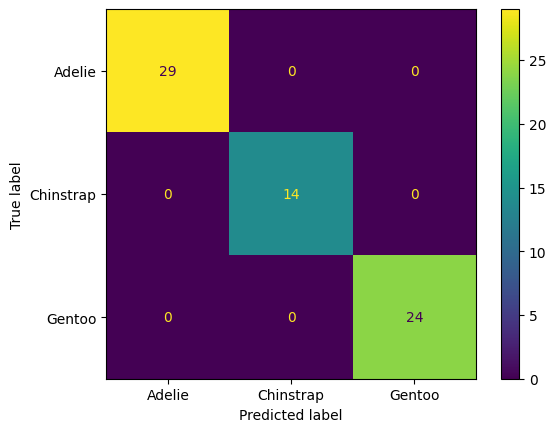

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['Adelie','Chinstrap','Gentoo']
disp.plot()